# This code extracts the information we will need from each drug

## Importing packages

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Downloading the data from CPIC

In [ ]:
cpic_drug_url = "https://api.cpicpgx.org/v1/drug"
cpic_recommendations_url = "https://api.cpicpgx.org/v1/recommendation"
cpic_test_alert_url = "https://api.cpicpgx.org/v1/test_alert"

def fetch_cpic_drug():

    response = requests.get(cpic_drug_url)
    data = response.json()

    return data

def fetch_cpic_recommendations():

    response = requests.get(cpic_recommendations_url)
    data = response.json()

    return data

def fetch_cpic_test_alert():

    response = requests.get(cpic_test_alert_url)
    data = response.json()

    return data

In [ ]:
drugs = fetch_cpic_drug()
recommendations = fetch_cpic_recommendations()
test_alert = fetch_cpic_test_alert()

## Saving the data as Data frames

In [ ]:
df_drugs = pd.DataFrame(drugs)
df_recommendations = pd.DataFrame(recommendations)
df_test_alert = pd.DataFrame(test_alert)

## Lok at the data frames

### Drugs

In [ ]:
df_drugs.head(2)

,drugid,name,pharmgkbid,rxnormid,drugbankid,atcid,umlscui,flowchart,version,guidelineid
0,RxNorm:42347,bupropion,PA448687,42347,DB01156,[N06AX12],None,None,64,NaN
1,RxNorm:83367,atorvastatin,PA448500,83367,DB01076,[C10AA05],None,https://files.cpicpgx.org/images/flow_chart/At...,135,100426.0


In [ ]:
df_drugs.shape

(316, 10)

In [ ]:
drugs_new = df_drugs[['drugid', 'name']]
# drugid = A unique identifier for this drug in the form “source:id” where source is some outside knowledge resource and id is their identifier, primary key
# name = The generic name for this drug, lower-cased, required

### Recomendations

In [ ]:
df_recommendations.head(2)

,id,guidelineid,drugid,implications,drugrecommendation,classification,phenotypes,activityscore,allelestatus,lookupkey,population,comments,version,dosinginformation,alternatedrugavailable,otherprescribingguidance
0,3312999,2405438,RxNorm:6878,{'G6PD': 'Low risk of acute hemolytic anemia'},No reason to avoid ased on G6PD status,Strong,{'G6PD': 'Normal'},{},{},{'G6PD': 'Normal'},general,None,1,False,False,False
1,3313000,2405438,RxNorm:6878,{'G6PD': 'High risk of acute hemolytic anemia'},Avoid use,Moderate,{'G6PD': 'Deficient'},{},{},{'G6PD': 'Deficient'},general,None,1,False,False,False


In [ ]:
df_recommendations.shape

(2098, 16)

In [ ]:
recommendations_new = df_recommendations[['drugid', 'implications', 'drugrecommendation', 'classification', 'phenotypes', 'activityscore', 'allelestatus', 'lookupkey', 'comments']]
# drugid = The drug this recommendation is for
# implications = Implications for phenotypic measures, this is a JSON mapping of gene to implication
# drugrecommendation = Dosing or therapeutic recommendations, depending on particular drug
# classification = Classification of recommendations, described in supplementary meterial
# phenotypes = Phenotypes that this recommendation applies to, this is a JSON mapping of gene to phenotype
# activityscore = Activity score that this recommendation applies to, this is a JSON mapping of gene to score value
# allelestatus = Whether or not an allele is present, used mainly for HLA genes, and used for recommendation lookups. This is a JSON mapping of gene to allele status (positive/negative)
# lookupkey = A key to use for finding a specific recommendation. Made of a JSON object of gene symbol to key value. The key value can be one of phenotype, activity score, or allele status depending on the gene.
# comments = Optional comments about the recommendation

In [ ]:
df_recommendations['dosinginformation'].value_counts()

False    2098
Name: dosinginformation, dtype: int64

In [ ]:
df_recommendations['drugrecommendation'].value_counts().head(2)

Initiate therapy with recommended starting dose.    172
No recommendation                                   112
Name: drugrecommendation, dtype: int64

### Test alert

In [ ]:
df_test_alert.head(2)

,id,population,cdscontext,genes,phenotype,activityscore,allelestatus,lookupkey,drugid,alerttext,version
0,3314556,general,Post-test,"[RYR1, CACNA1S]","{'RYR1': 'Uncertain Susceptibility', 'CACNA1S'...","{'RYR1': 'n/a', 'CACNA1S': 'n/a'}",{},"{'RYR1': 'Uncertain Susceptibility', 'CACNA1S'...",RxNorm:5095,"[Based on genotype, this patient is predicted ...",1
1,3314557,general,Post-test,"[RYR1, CACNA1S]",{'RYR1': 'Malignant Hyperthermia Susceptibilit...,"{'RYR1': 'n/a', 'CACNA1S': 'n/a'}",{},{'RYR1': 'Malignant Hyperthermia Susceptibilit...,RxNorm:5095,"[Based on genotype, this patient is predicted ...",1


In [ ]:
test_alert_new = df_test_alert[['drugid', 'genes', 'phenotype', 'activityscore', 'allelestatus', 'lookupkey', 'alerttext']]
# drugid = The ID of a drug this alert text is for
# genes = One or more genes this test alert uses for trigger conditions
# phenotype = A JSON object of gene symbol keys to phenotype description
# activityscore = A JSON object of gene symbol keys to gene activity score
# allelestatus = Whether or not an allele is present, used mainly for HLA genes. This is a JSON mapping of gene to allele status (positive/negative)
# lookupkey = A key to use for finding a specific test alert. Made of a JSON object of gene symbol to key value. The key value can be one of phenotype, activity score, or allele status depending on the gene.
# alerttext = An array of one or more pieces of alert text

In [ ]:
df_test_alert['genes'].value_counts()

[CYP2D6, CYP2C19]    1035
[CYP2D6]              291
[G6PD]                198
[CYP2C19]             117
[TPMT, NUDT15]        108
[CYP2B6, CYP2C19]      63
[CYP2C9, SLCO1B1]      49
[CYP2C9]               49
[MT-RNR1]              44
[RYR1, CACNA1S]        42
[CYP2C9, HLA-B]        42
[SLCO1B1]              35
[SLCO1B1, ABCG2]       28
[DPYD]                 12
[HLA-B]                 9
[HLA-B, HLA-A]          9
[CYP2B6]                7
[CYP3A5]                6
[UGT1A1]                5
Name: genes, dtype: int64

In [ ]:
df_test_alert['alerttext'][0]

['Based on genotype, this patient is predicted to be malignant hyperthermia susceptible. Halogenated volatile anesthetics or depolarizing muscle relaxants are relatively contraindicated in persons with MHS. They should not be used, except in extraordinary circumstances where the benefits outweigh the risks. In general, alternative anesthetics are widely available, effective, and safe in patients with MHS. Please consult an anesthesiologist or clinical pharmacist for more information.']

## Creating 1 dataframe with everything we will need.

In [ ]:
merge1 = pd.merge(drugs_new, recommendations_new, left_on = 'drugid', right_on = 'drugid', how = 'inner')
merge2 = pd.merge(merge1, test_alert_new, left_on = 'drugid', right_on = 'drugid', how = 'inner')
merge2

,drugid,name,implications,drugrecommendation,classification,phenotypes,activityscore_x,allelestatus_x,lookupkey_x,comments,genes,phenotype,activityscore_y,allelestatus_y,lookupkey_y,alerttext
0,RxNorm:83367,atorvastatin,{'SLCO1B1': 'Typical myopathy risk and statin ...,Prescribe desired starting dose and adjust dos...,Strong,{'SLCO1B1': 'Increased Function'},{},{},{'SLCO1B1': 'Increased Function'},The potential for drug-drug interactions and d...,[SLCO1B1],{'SLCO1B1': 'No Result'},{'SLCO1B1': 'No result on file'},{},{'SLCO1B1': 'No Result'},[SLCO1B1 genetic status may be predictive of t...
1,RxNorm:83367,atorvastatin,{'SLCO1B1': 'Typical myopathy risk and statin ...,Prescribe desired starting dose and adjust dos...,Strong,{'SLCO1B1': 'Increased Function'},{},{},{'SLCO1B1': 'Increased Function'},The potential for drug-drug interactions and d...,[SLCO1B1],{'SLCO1B1': 'Increased Function'},{'SLCO1B1': 'n/a'},{},{'SLCO1B1': 'Increased Function'},[n/a]
2,RxNorm:83367,atorvastatin,{'SLCO1B1': 'Typical myopathy risk and statin ...,Prescribe desired starting dose and adjust dos...,Strong,{'SLCO1B1': 'Increased Function'},{},{},{'SLCO1B1': 'Increased Function'},The potential for drug-drug interactions and d...,[SLCO1B1],{'SLCO1B1': 'Normal Function'},{'SLCO1B1': 'n/a'},{},{'SLCO1B1': 'Normal Function'},[n/a]
3,RxNorm:83367,atorvastatin,{'SLCO1B1': 'Typical myopathy risk and statin ...,Prescribe desired starting dose and adjust dos...,Strong,{'SLCO1B1': 'Increased Function'},{},{},{'SLCO1B1': 'Increased Function'},The potential for drug-drug interactions and d...,[SLCO1B1],{'SLCO1B1': 'Decreased Function'},{'SLCO1B1': 'n/a'},{},{'SLCO1B1': 'Decreased Function'},[This patient is predicted to have SLCO1B1 dec...
4,RxNorm:83367,atorvastatin,{'SLCO1B1': 'Typical myopathy risk and statin ...,Prescribe desired starting dose and adjust dos...,Strong,{'SLCO1B1': 'Increased Function'},{},{},{'SLCO1B1': 'Increased Function'},The potential for drug-drug interactions and d...,[SLCO1B1],{'SLCO1B1': 'Possible Decreased Function'},{'SLCO1B1': 'n/a'},{},{'SLCO1B1': 'Possible Decreased Function'},[This patient is predicted to have SLCO1B1 pos...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236439,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Normal risk of oxcarbazepine-induce...,Use oxcarbazepine per standard dosing guidelines.,Strong,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 negative'},{'HLA-B': '*15:02 negative'},n/a,[HLA-B],{},{},{'HLA-B': '*15:02 positive'},{'HLA-B': '*15:02 positive'},[HLA-B*15:02 genetic status may be predictive ...
236440,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Normal risk of oxcarbazepine-induce...,Use oxcarbazepine per standard dosing guidelines.,Strong,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 negative'},{'HLA-B': '*15:02 negative'},n/a,[HLA-B],{},{},{'HLA-B': '*15:02 negative'},{'HLA-B': '*15:02 negative'},[n/a]
236441,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Greater risk of oxcarbazepine-induc...,The latency period for drug-induced SJS/TEN is...,Optional,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 positive'},{'HLA-B': '*15:02 positive'},Previous tolerance of oxcarbazepine is not ind...,[HLA-B],{},{},{'HLA-B': 'No *15:02 result on file'},{'HLA-B': 'No *15:02 result on file'},[HLA-B*15:02 genetic status may be predictive ...
236442,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Greater risk of oxcarbazepine-induc...,The latency period for drug-induced SJS/TEN is...,Optional,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 positive'},{'HLA-B': '*15:02 positive'},Previous tolerance of oxcarbazepine is not ind...,[HLA-B],{},{},{'HLA-B': '*15:02 positive'},{'HLA-B': '*15:02 positive'},[HLA-B*15:02 genetic status may be predictive ...


## Finding just the ones with Strong classification

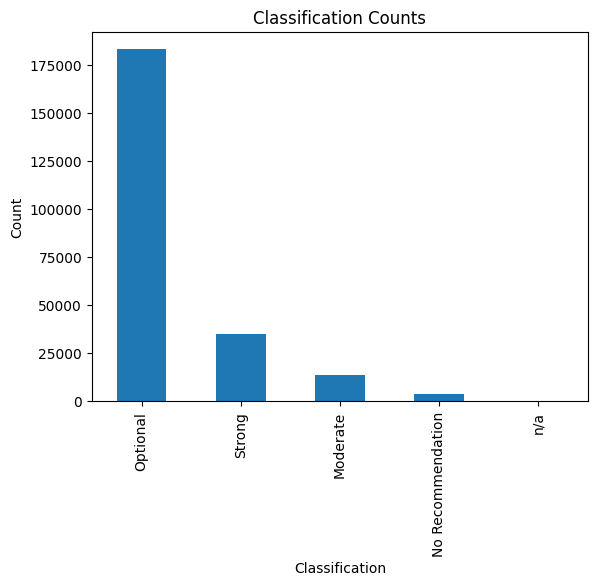

In [ ]:
classification_counts = merge2['classification'].value_counts()

classification_counts.plot(kind='bar')

plt.title('Classification Counts')
plt.xlabel('Classification')
plt.ylabel('Count')

plt.show()

In [ ]:
filtered_df = merge2[merge2['classification'] == 'Strong']

In [ ]:
filtered_df.shape

(34974, 16)

In [ ]:
unique_drugids = filtered_df['drugid'].nunique()
unique_drugids

102

In [ ]:
name_drugs = filtered_df['name'].unique()

In [ ]:
filtered_df.to_csv('filtered_drugs_recommendations.csv')

In [ ]:
pd.DataFrame(name_drugs).to_csv("name_drugs.csv", header=None, index=None)